In [1]:
#librerias
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

**1.** Muestre que los siguientes operadores diferenciales:
$$f'(x) = \lim_{h \rightarrow 0} \frac{-f(x + 2h) + 4f(x + h) - 3f(x)}{2h} $$
$$f''(x) = \lim_{h \rightarrow 0}\frac{f(x + h) -2f(x) + f(x-h)}{h^2} $$
son consistentes. Use la función de prueba $f(x) = x^2$ y $f(x) = sin (x)$.

Un operador se considerará consistente si éste concuerda con la derivada analítica de la función dada. Primero, tomando a $x^2$ como función de prueba tenemos que:
$$ f'(x) = \lim_{h \rightarrow 0} \frac{-f(x + 2h) + 4f(x + h) - 3f(x)}{2h}= \lim_{h \rightarrow 0}\frac{- (x + 2h)^2 + 4(x + h)^2 - 3x^2}{2h} $$
Simplificando obtenemos:
$$ f'(x) = \lim_{h \rightarrow 0}\frac{-x^2 - 4hx - 4h^2 + 4x^2 + 8hx + 4h^2 - 3x^2}{2h} = \lim_{h \rightarrow 0}\frac{4hx}{2h} = 2x $$
Dado que la derivada analítica de la función también es 2x el operador es consistente. Realizando el mismo procedimiento para el segundo operador observamos que también se cumplirá la condición de consistencia.
$$ f''(x) = \lim_{h \rightarrow 0}\frac{f(x + h) -2f(x) + f(x-h)}{h^2} = \lim_{h \rightarrow 0}\frac{(x + h)^2 -2x^2 + (x-h)^2}{h^2} $$
$$ f''(x) = \lim_{h \rightarrow 0}\frac{x^2 + 2hx + h^2 - 2x^2 + x^2 - 2xh + h^2}{h^2} = \lim_{h \rightarrow 0}\frac{2h^2}{h^2} = 2 $$
Ahora bien, tomando como prueba a la función $sin(x)$ tenemos que:
$$ f'(x) = \lim_{h \rightarrow 0} \frac{-f(x + 2h) + 4f(x + h) - 3f(x)}{2h}= \lim_{h \rightarrow 0}\frac{- sin(x + 2h) + 4sin(x + h) - 3sin(x)}{2h} $$
$$ f'(x) = \lim_{h \rightarrow 0}\frac{-sin(x)cos(2h)-sin(2h)cos(x)+4sin(x)cos(2h)+4sin(2h)cos(x)-3sin(x)}{2h} $$
Dado que el límite es de la forma cero sobre cero aplicamos L'Hopital obteniendo que el operador de la primera derivada es consistente:
$$= \lim_{h \rightarrow 0}\frac{2sin(x)sin(2h)-2cos(2h)cos(x)-4sin(x)sin(h)+4cos(h)cos(x)}{2}=-cos(x)+2cos(x)=cos(x)   $$
Aplicando el procedimiento al segundo operador tenemos:
$$ f''(x) = \lim_{h \rightarrow 0} \frac{f(x + h) -2f(x) + f(x-h)}{h^2}= \lim_{h \rightarrow 0}\frac{sin(x + h) - 2sin(x) + sin(x-h)}{h^2} $$
$$ f''(x) = \lim_{h \rightarrow 0}\frac{sin(x)cos(h)+sin(h)cos(x)-2sin(x)+sin(x)cos(h)-sin(h)cos(x)}{h^2} = \lim_{h \rightarrow 0}\frac{2sin(x)cos(h)-2sin(x)}{h^2}$$
Dado que el límite es de la forma cero sobre cero aplicamos L'Hopital obteniendo que el operador de la segunda derivada es consistente:
$$= \lim_{h \rightarrow 0}\frac{sin(x)cos(h)-sin(x)}{h}=\lim_{h \rightarrow 0}-sin(x)cos(h)=-sin(x)   $$

Así queda mostrado que ambos operadores son consistentes.

**2.** Usando el código de la clase, genere 10 esferas localizadas aleatoriamente en la mesa A = 40 × 40 con velocidad aleatorias entre −5 m/s y 5 m/s. Simule 10 s con un paso
de integración de h = 0.001 s y reduzca la simulación en un factor de 200; quitando la interacción con la pared. Conteste las siguientes preguntas exponiendo los conceptos físicos involucrados.

In [2]:
#Segundo punto
class Particle:
    def __init__(self, r0, v0, a0, t, Id, m=1, radius=2.):
        #Atributos únicos
        self.dt=t[1]-t[0]
        
        self.r=r0
        self.v=v0
        self.a=a0
        
        self.m=m
        self.radius=radius
        self.Id=Id
        
        self.p=self.m*self.v
        self.f = self.m*self.a

        #Historial 
        self.R=np.zeros((len(t),len(r0)))
        self.V=np.zeros_like(self.R)
        self.A=np.zeros_like(self.R)
        self.F=np.zeros_like(self.R)
        self.P=np.zeros_like(self.R)
        
        #Física (K es dureza de las esferas, VEk energía cinética, VUk y Uk energía potencial, Lz momento angular)
        self.K=10.
        self.VEk = np.zeros(len(t))
        self.VUk = np.zeros(len(t))
        self.Lz = np.zeros(len(t))
        self.Uk = 0.
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.a=self.f/self.m
        
        self.SetPotential(i)
        self.SetAngularMomentum(i)
        
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
    def CalculateForce(self,p):
        d=np.linalg.norm(self.r-p.r)
        compresion=self.radius+p.radius-d
        
        if compresion >=0:
            Fn = self.K*compresion**3
            self.n=(self.r-p.r)/d
            self.f=Fn*self.n
            self.Uk += (self.K/4)*(compresion**4)
            
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.Uk = 0.
        
    #Setter
    def SetPosition(self,i):
        self.R[i]=self.r
        
        
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        
    def SetPotential(self,i):
        self.VUk[i] = self.Uk
        
    def SetAngularMomentum(self,i):
        self.Lz[i] = np.cross(self.r,self.m*self.v)
        
    #Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
        
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialEnergy(self,scale=1):
        return self.VUk[::scale] 

    def GetAngularMomentum(self,scale=1):
        return self.Lz[::scale] 
    

In [3]:
def GetParticles(N,t):
    P=[0]*N
    for i in range(N):
        v_p=np.array([np.random.uniform(-5,5),np.random.uniform(-5,5)])
        r_p=np.array([np.random.uniform(-20,20),np.random.uniform(-20,20)])
        a_p= np.array([0.,0.])
        I_p=i
        p=Particle(r_p,v_p,a_p,t,I_p,m=1,radius=1)
        P[i]=p
    return P

In [4]:
#Parámetros de tiempo y espacio
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetParticles(10,t)
walls = np.array([[-20., 20.],[-20., 20.]])


In [5]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
                
    return Particles

RunSimulation(t, Particles)

Running simulation: 100%|██████████| 10000/10000 [00:37<00:00, 269.97 Steps/s]


In [6]:
scale=50
t1 = t[::scale]

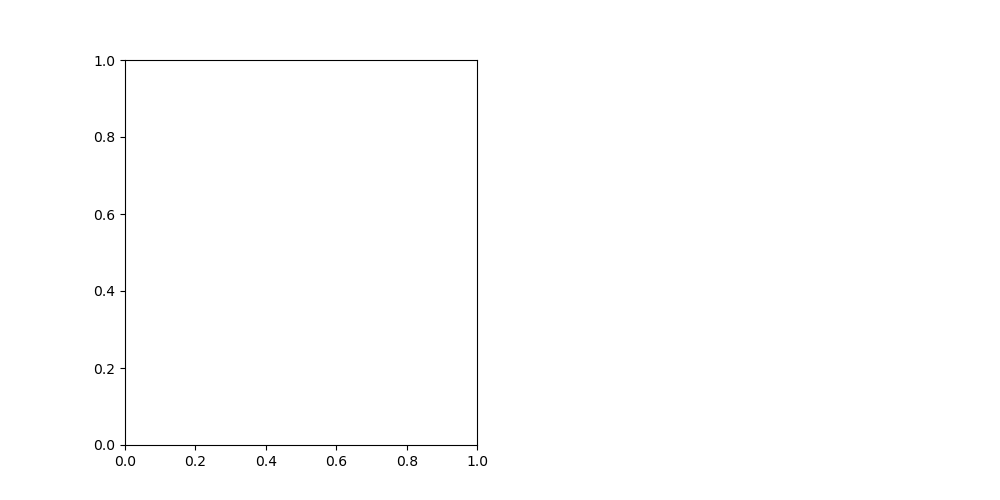

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)

def init():
    ax.clear()
    ax.set_xlim(walls[0][0], walls[0][1])
    ax.set_ylim(walls[1][0], walls[1][1])
    
def Update(i):
    init()
    ax.set_title(r'$ t=%.3f \ s$' %(t[i]))
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=True )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)


In [8]:
KE = np.zeros_like(len(Particles)) # Kinetic energy
UK = np.zeros_like(len(Particles)) # Potential energy
LZ = np.zeros_like(len(Particles)) # Angular momentum
MT = Particles[0].GetMomentum(scale) # Momentum
    
for i in range(1,len(Particles)):
    MT = np.add(MT,Particles[i].GetMomentum(scale))
    KE = np.add(KE, Particles[i].GetKineticEnergy(scale))
    UK = np.add(UK, Particles[i].GetPotentialEnergy(scale))
    LZ = np.add(LZ, Particles[i].GetAngularMomentum(scale))

In [9]:
#Writer = anim.writers['ffmpeg']
#writer_ = Writer(fps=10, metadata=dict(artist='Me'))

**(a) y (b)** Grafique el momento lineal total en x (px) y y (py) en función del tiempo. Se deberían conservar?

**Respuesta:** Sí se conserva en el sistema dado que no actúan fuerzas externas como la interacción de las propias partículas con la pared. Además, gracias a que la fuerza de contacto resulta ser interna, permite que se conserve el momentum lineal.

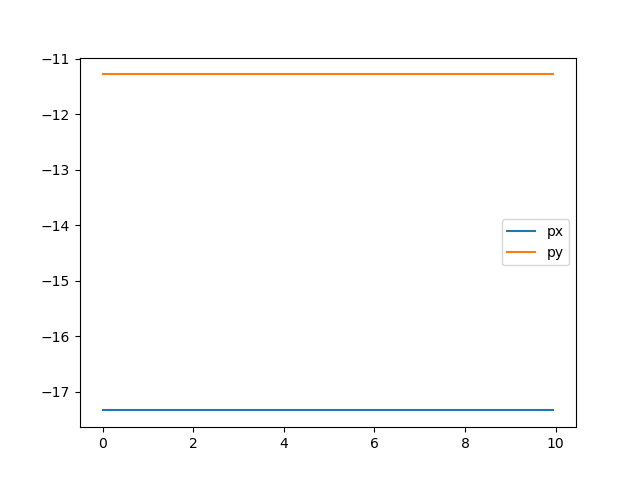

In [10]:
plt.figure()
plt.plot(t1,MT[:,0],label='px')
plt.plot(t1,MT[:,1],label='py')
plt.legend()
plt.show()

**(c)** Teóricamente muestre que la fuerza de contacto es conservativa. Encuentre la energía potencial.

**Respuesta:** La fuerza de contacto estará dada por:
$$F_n=K\left[r_1+r_2-\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}\right]^3 \hat{n}$$
Para mostrar que dicha fuerza es conservativa se tomará el caso particular de dos partículas con una situada en el origen. Así podemos escribir nuevamente la fuerza utilizando una notación vectorial:
$$F_n=K\left[(x_1,y_1)-\sqrt{x_1^2 + y_1^2}\right]^3 \hat{n}= \left[K\left(x_1-\sqrt{x_1^2 + y_1^2}\right)^3\hat{n_i},K\left(y_1-\sqrt{x_1^2 + y_1^2}\right)^3\hat{n_j}\right]$$
Donde $\hat{n}$ será el vector normal dado por:
$$\hat{n}=\left(\frac{x_1}{\sqrt{x_1^2 + y_1^2}},\frac{y_1}{\sqrt{x_1^2 + y_1^2}}\right) $$
Ahora, tomando la fuerza como una función vectorial, esta será conservativa si existe una función escalar f que cumpla con $F=-\nabla f$, esto implica $\nabla \times F=0$. Al ser esta una fuerza en dos dimensiones podemos escribir su rotacional como:
$$\nabla \times F= 0\hat{i} + 0\hat{j}+ \left( \frac{\partial}{\partial x}F_{ny}-\frac{\partial}{\partial y}F_{nx} \right)\hat{k} $$
$$ \frac{\partial}{\partial x}F_{ny} = 3K\left[ \left(x_1-\sqrt{x_1^2 + y_1^2}\right)^2 \left(\frac{-y_1}{\sqrt{x_1^2 + y_1^2}}\right)\left(\frac{x_1}{\sqrt{x_1^2 + y_1^2}}\right) +...\\ \left(x_1-\sqrt{x_1^2 + y_1^2}\right)^3 \left(\frac{x_1}{\sqrt{x_1^2 + y_1^2}}\right) \left(4x_1y_1\sqrt{x_1^2 + y_1^2}\right)\right]$$
$$\frac{\partial}{\partial y}F_{nx} = 3K\left[ \left(y_1-\sqrt{x_1^2 + y_1^2}\right)^2 \left(\frac{-x_1}{\sqrt{x_1^2 + y_1^2}}\right)\left(\frac{y_1}{\sqrt{x_1^2 + y_1^2}}\right) +...\\ \left(y_1-\sqrt{x_1^2 + y_1^2}\right)^3 \left(\frac{y_1}{\sqrt{x_1^2 + y_1^2}}\right) \left(4x_1y_1\sqrt{x_1^2 + y_1^2}\right)\right] $$
$$\left( \frac{\partial}{\partial x}F_{ny}-\frac{\partial}{\partial y}F_{nx} \right)\hat{k} = 0 \hat{k} $$
Así, queda mostrado que la fuerza es conservativa. Por otro lado, para encontrar la energía potencial del sistema podemos utilizar la relación existente entre la misma y el trabajo realizado por las fuerzas conservativas de un sistema:
$$ F=-\nabla U \rightarrow \int F \dot dx = -\Delta U $$
Esto significa que la energía transferida como trabajo reduce la energía potencial del sistema del cual provino la misma. Así, realizando la integral sobre la función conocida para la fuerza de contacto sería de la forma:

$$\int_{r_n}^{r_{n+1}} K \left( \vec{r}-\sqrt{x^2 + y^2}\right)^3 dr = \frac{K}{4}\left( \vec{r}-\sqrt{x^2 + y^2}\right)^4 = \Delta U $$

Esto es teniendo en cuenta que el desplazamiento de las partículas estará dado por $\Delta r_n=r_n-r_{n+1}$.

**(d)** Grafique la energía cinética total en función del tiempo. Se conserva?

**Respuesta:** Sí, se conserva.  

**(e)** Grafique la energía potencial total en función del tiempo. ¿Qué significa que el potencial sea positivo?

**Respuesta:** Que el potencial sea positivo puede justificar la existencia de la fuerza de contacto entre las partículas, que a su vez actúa como una fuerza repulsiva. Esta fuerza también puede indicar la capacidad de las partículas para realizar trabajo al moverse hacia una posición de menor energía potencial.

**(f)** Grafique la energía mecánica total en función del tiempo. Se conserva? Explique a nivel físico y a nivel del método de Euler.

**Respuesta:** A nivel físico se conserva ya que no existe la intervención de fuerzas externas y que el cambio en el momentum lineal es cero. A nivel del método de Euler se conserva gracias a la definición de la energía potencial como parte evolutiva del sistema, además de la consideración de que el método toma el doble de la energía potencial por la interacción de las mismas.

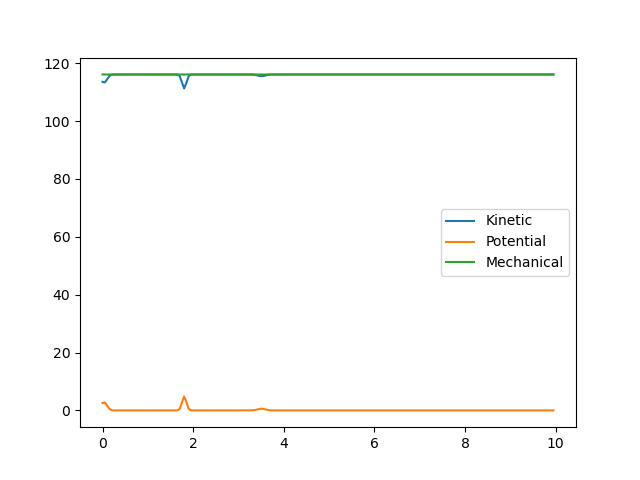

In [11]:
plt.figure()
plt.plot(t1,KE,label='Kinetic')
plt.plot(t1,UK*0.5,label='Potential')
plt.plot(t1,KE+UK*0.5,label='Mechanical')
plt.legend()
plt.show()

**(g)** Se cumple el teorema del trabajo y la energía en su simulación? Argumente.

**Respuesta:** El teorema del trabajo y la energía, establece que el trabajo neto realizado por todas las fuerzas que actúan sobre una partícula es igual al cambio en su energía cinética. En este caso no se cumpliría ya que como se mencionó anteriormente, el trabajo neto realizado estaría dado principalmente por la energía potencial al ser la fuerza conservativa. 

**(h)** Calcule y grafique el momento angular en el eje z ($L_z$). Se conserva?

**Respuesta:** Sí se conserva aunque la gráfica muestre cierto comportamiento no conservativo, esto se debe a la escala de la misma.

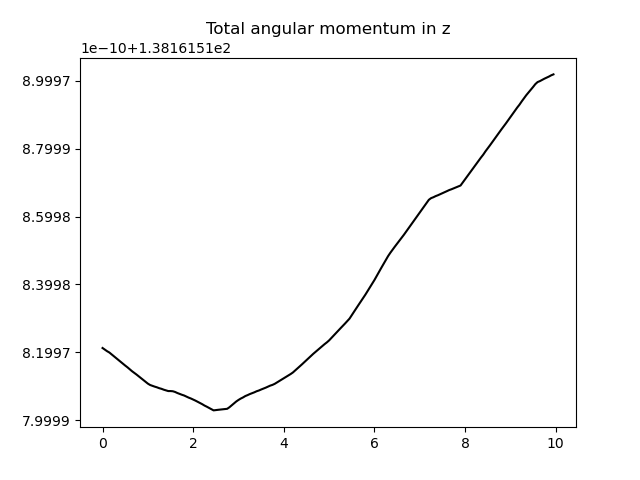

In [12]:
plt.figure()
plt.plot(t1,LZ,color='k')
plt.title('Total angular momentum in z')
plt.show()

**(i)** Si este sistema que se mueve en 2D se extendiera a 3D, las partículas se mantendrían en el mismo plano de movimiento o se moverían en todo el volumen?

**Respuesta:** Se moverían por todo el volumen ya que el código no especifica la dimesión del vector en alguna función de movimiento. Lo único necesario sería definir la simulación para tres dimensiones.

## Punto 3 - Velocidad de la luz
Se realiza un factor de unidades para transformar la velocidad de la luz: 
$$ c = 3 \cdot 10^8 \frac{m}{s} \cdot \left( \frac{60 s}{1 min} \right ) \cdot \left( \frac{60 min}{1 h} \right ) \cdot \left( \frac{24h}{1 dia} \right ) \cdot \left( \frac{365 dias}{1 año} \right ) \cdot \left( \frac{1 AU}{1.5\dot 10^{11} m } \right ) =6.307 \cdot 10^4 \frac{AU}{año} $$


## Punto 4

In [13]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t #Array del tiempo 
        self.dt = t[1] - t[0] # Paso del tiempo - h
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3) # Posicion en tres dimensiones
        self.v = np.zeros_like(self.r)#Velocidad en tres dimensiones
        self.a = np.zeros_like(self.r)#Acelearacion en tres dimensiones
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def Geta_(self):
        return self.a_
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup
    def GetPeriodo(self): #Tarea parte b: Calculo del periodo de la orbita ( en años terrestres)
        
        timesPerihelio = self.GetPerihelio()
        if len(timesPerihelio)!= 0: 
            
            return timesPerihelio[-1]- timesPerihelio[-2]
        else: 
            return None

In [14]:
def GetPlanetas(t):
    #Tarea parte A: Planetas con sus semiejes mayores y excentricidad
    
    Mercurio = Planeta(0.2056,0.307,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    Marte =Planeta(0.093315,1.523662 ,t)
    Jupiter= Planeta(0.0487749764,5.20336301,t)
    
    return [Mercurio,Venus,Tierra, Marte, Jupiter]

In [15]:
dt = 0.001
tmax =100
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [16]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            
    return Planetas

In [17]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 100000/100000 [00:34<00:00, 2897.12 Steps/s]


In [18]:
def findPeriodosCuadrado(planetas): #Tarea parte b: Calculo del periodo de la orbita ( en años terrestres)
    
    periodos = np.zeros(len(planetas))
    i=0 
    for p in planetas: 
        periodo =p.GetPeriodo()**2
        periodos[i]= periodo
        i+=1
    return periodos
print(findPeriodosCuadrado(Planetas))

[2.89000000e-02 3.78225000e-01 1.00000000e+00 3.53816100e+00
 1.40873161e+02]


Text(0, 0.5, 'Periodo al cuadrado')

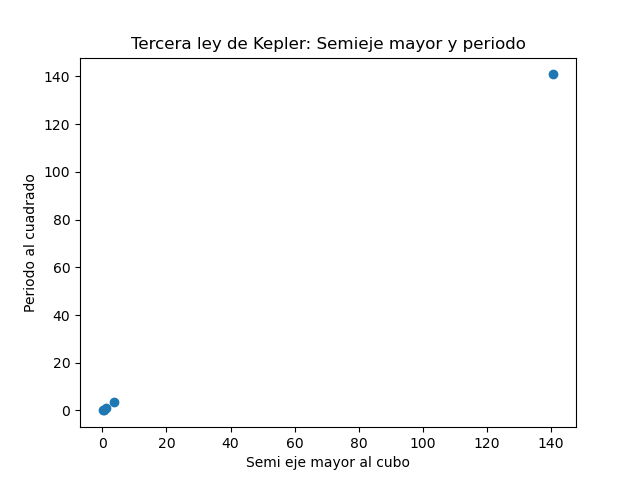

In [19]:
#Tarea parte C: Periodo al cuadrado vs semieje mayor al cubo 
def GetSemiEjesMayor(planetas):
    semiejes = np.zeros(len(Planetas))
    i=0 

    for p in Planetas: 

        a_3 = (p.Geta_())**3
        semiejes[i] = a_3
        i+=1
    return semiejes
periodos=findPeriodosCuadrado(Planetas)
semiejes = GetSemiEjesMayor(Planetas)


fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.set_title('Tercera ley de Kepler: Semieje mayor y periodo')
ax2.scatter(semiejes, periodos)
ax2.set_xlabel("Semi eje mayor al cubo")
ax2.set_ylabel("Periodo al cuadrado")


In [20]:
#Tarea parte D: Regresion lineal para pendiente y punto de corte
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y



_semiejes = np.linspace(np.min(semiejes),np.max(semiejes),100)


param = GetFit(semiejes,periodos)
#print(param)

regresion = GetModel(_semiejes,param)

ax2.plot(_semiejes, regresion)

### Regresión lineal y masa del sol
Con la tercera ley de kepler se encuentra que el cuadrado de los periodos esta relacionado con el cubo del semiejemayor mediante una constante la cual equivale a: 
$$C = \frac{4\pi^2}{G\cdot M_\odot} $$

En este caso se han usado unidades Gaussianas por lo que $G = 4\pi^2$ de forma que C toma el valor de: 
$$C = \frac{1}{ M_\odot}$$

Siendo $M_\odot\$ la masa del sol

In [21]:
#Tarea parte E: Calcular la masa del sol 
# C = 1/Mt
#Esperado = 1
m_expected = 1
m_simulation = 1/param[1]
difference = abs(m_expected-m_simulation)
print('Unidades Gaussianas - Simulacion: {} Esperado : {} Error: {}'.format(m_simulation, m_expected,difference))


#El valor esperado es aproximadamente de 1 con un error bastante bajo, por lo que la simulación es correcta.
#En el sistema internacional
m_simulation_SI= m_simulation*1.98847e30
m_expected_SI = 1.98847e30
difference_SI = abs(m_expected_SI-m_simulation_SI)
print('Unidades Sistema internacional - Simulacion: {} Esperado : {} Error: {}'.format(m_simulation_SI, m_expected_SI,difference_SI))

Unidades Gaussianas - Simulacion: 1.0000570955984602 Esperado : 1 Error: 5.709559846023282e-05
Unidades Sistema internacional - Simulacion: 1.9885835328846703e+30 Esperado : 1.98847e+30 Error: 1.1353288467034095e+26


**5.** Considere la siguiente ecuación diferencial:
$$\frac{du}{dt}=\alpha u \quad u(0)=u_0 $$

Muestre que aplicando iterativamente se obtiene:

$$u_k = (1+\alpha \Delta t)^k u_0 $$

Para el caso donde $\alpha < 0$. Muestre que la solución numérica oscilará si $\Delta t > \frac{-1}{\alpha}$. Ajuste $\alpha = −1$ y muestre las soluciones oscilatorias para $\Delta t = 1.1, 1.5, 1.9 s$. Por otro lado, la solución exacta nunca oscila $u(t) = e^{\alpha t}$.

**Respuesta:** Para demostrar dicho método tomaremos la definición de la derivada para el método de Euler, la que nos permite una discretización del espacio.

$$ \frac{u_1 - u_0}{\Delta t} = u_0 \alpha $$

Teniendo en cuenta las condiciones iniciales del problema y despejando para $u_1$ obtenemos una expresión que depende únicamente del valor inicial. Realizando el mismo procedimiento para varios términos de la discretización podemos observar que se cumple cierto comportamiento. Para dejar dichas expresiones en términos de la solución inicial podemos elevar a la k-ésima solución de la sucesión y así obtener que:

$$ u_2 = (1+\alpha \Delta t) u_1 \quad u_3 = (1+\alpha \Delta t) u_2  \rightarrow u_2 = (1+\alpha \Delta t)^2 u_0 \quad u_3 = (1+\alpha \Delta t)^3 u_0 \quad ... \quad u_k = (1+\alpha \Delta t)^k u_0 $$

Lo cual se cumplirá para $\alpha < 0$. Por otra parte, es fácil ver que la solución numérica oscilará si $1+\alpha \Delta t <0$. Dado que la base de la potencia será negativa, cuando k sea par esta será positiva y negativa si k es impar. Así, la mimsa oscilará.

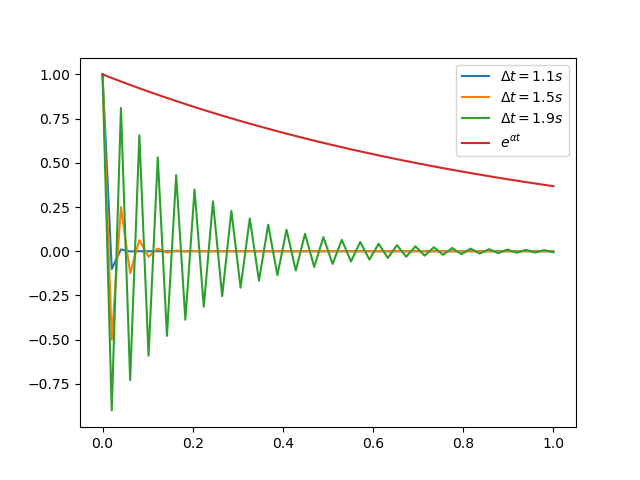

In [22]:
t=np.linspace(0,1,50)

def U(a,dt):
    u = []
    for k in range(50):
        u.append((1+a*dt)**k)
    return u

plt.figure()
plt.plot(t,U(-1,1.1),label=r'$\Delta t=1.1 s$')
plt.plot(t,U(-1,1.5),label=r'$\Delta t=1.5 s$')
plt.plot(t,U(-1,1.9),label=r'$\Delta t=1.9 s$')
plt.plot(t,np.e**(-t),label=r'$e^{\alpha t}$')
plt.legend()
plt.show()